In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf
import tushare as ts
import yaml
import os
FILE_ROOT = os.getcwd()
# CONFIG_PATH = os.path.join(FILE_ROOT, 'Config')


In [6]:

for file in filter(lambda x: x.endswith('.yaml'), os.listdir(FILE_ROOT)):
    config = yaml.load(open(os.path.join(FILE_ROOT, file), 'rb'), Loader=yaml.FullLoader)
    
ts.set_token(config["ts_token"])
pro = ts.pro_api()

In [9]:
df = pro.query('daily', ts_code='600519.SH', start_date='20231201', end_date='20240409') # 读取股票数据 600519.SH 是贵州茅台的股票代码
# df = pro.query('daily', ts_code='000300.SH', start_date='20201201', end_date='20240409') # 读取股票数据 000300.SH 是沪深300指数的代码

In [10]:
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600519.SH,20240409,1660.67,1673.00,1658.45,1662.22,1666.66,-4.44,-0.2664,25589.82,4256226.333
1,600519.SH,20240408,1695.00,1696.00,1662.60,1666.66,1715.11,-48.45,-2.8249,59166.59,9907355.766
2,600519.SH,20240403,1734.00,1739.44,1710.02,1715.11,1713.99,1.12,0.0653,29045.80,5002390.042
3,600519.SH,20240402,1722.00,1724.99,1705.05,1713.99,1721.33,-7.34,-0.4264,25449.25,4360973.684
4,600519.SH,20240401,1709.99,1734.00,1708.70,1721.33,1702.90,18.43,1.0823,27131.37,4679371.035


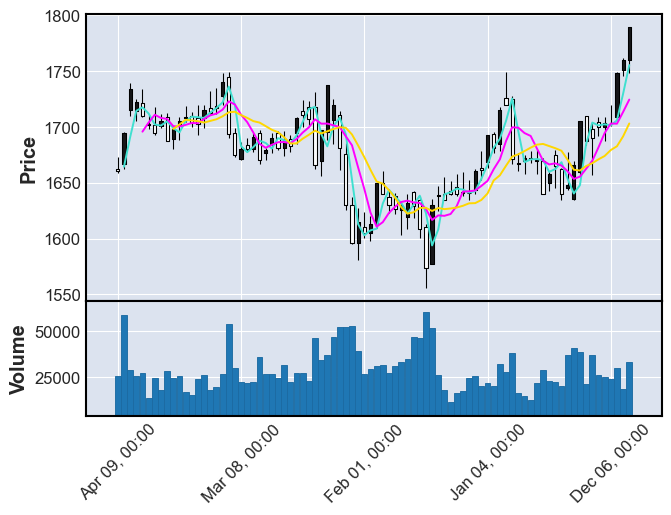

In [11]:
df['trade_date'] = pd.to_datetime(df['trade_date'])
df=df.set_index('trade_date')
df['volume']=df['vol']
mpf.plot(df,type='candle', mav=(2, 5, 10), volume=True)